In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pingouin as pg
from mindstorm import dsmplot
from mindstorm import statplot
from tesser import tasks
from tesser import network
from tesser import model
from tesser import figures

main_dir = os.environ['TESSER_DIR']
data_dir = os.path.join(main_dir, 'Data')
fig_dir = os.path.join(main_dir, 'Figures', 'model')
model_name = 'sr_a10'

In [2]:
struct = tasks.load_struct(data_dir)
induct = tasks.load_induct(data_dir)

In [3]:
fixed = {'alpha': 0.1}
var_names = ['gamma', 'tau']
var_bounds = {
    'gamma': [0, 1],
    'tau': [0, 10],
}
sim1_spec = {'alpha': 'alpha', 'gamma': 'gamma'}
sim2_spec = None
question_param = None
full_results = model.fit_induct_indiv(
    struct,
    induct,
    fixed,
    var_names,
    var_bounds,
    sim1_spec,
    sim2_spec=sim2_spec,
    question_param=question_param,
    n_job=6,
    n_rep=5,
)

In [4]:
full_results

logl   n  k  alpha  gamma        tau
subject rep                                           
100     0   -42.311847  42  2    0.1    0.0  10.000000
        1   -42.311847  42  2    0.1    0.0  10.000000
        2   -42.311847  42  2    0.1    0.0  10.000000
        3   -42.311847  42  2    0.1    0.0  10.000000
        4   -42.311847  42  2    0.1    0.0  10.000000
...                ...  .. ..    ...    ...        ...
138     0   -28.941711  42  2    0.1    0.0   0.796783
        1   -28.941711  42  2    0.1    0.0   0.796781
        2   -28.941711  42  2    0.1    0.0   0.796784
        3   -28.941711  42  2    0.1    0.0   0.796783
        4   -28.941711  42  2    0.1    0.0   0.796779

[185 rows x 6 columns]

In [5]:
results = model.get_best_results(full_results)
results

,,logl,n,k,alpha,gamma,tau
subject,rep,,,,,,
100,0,-42.311847,42,2,0.1,0.000000,10.000000
101,1,-28.324843,42,2,0.1,1.000000,1.087240
102,0,-23.790586,42,2,0.1,0.906803,0.284393
103,3,-27.919273,42,2,0.1,0.583954,0.354026
104,4,-28.732084,42,2,0.1,0.000000,0.456491
105,1,-36.275644,42,2,0.1,1.000000,0.375790
106,0,-38.357452,42,2,0.1,0.712476,0.191126
107,2,-28.755641,42,2,0.1,0.146707,0.513216
108,0,-28.735534,42,2,0.1,1.000000,1.840377


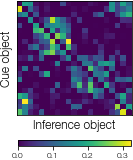

In [6]:
s1 = struct.query('subject == 100')
sr = model.learn_struct_sr(s1, results.loc[100, 'gamma'], results.loc[100, 'alpha'], 21)

fig, ax = plt.subplots(figsize=(3, 3))
h = dsmplot.plot_dsm(sr, prange=(0, 100), checks=False, ax=ax);
fig.colorbar(h, location='bottom', shrink=0.677);
ax = plt.gca()
ax.set_axis_on()
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.tick_params('both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax.set_xlabel('Inference object', size='large')
ax.set_ylabel('Cue object', size='large')
plt.savefig(os.path.join(fig_dir, f'temporal_bias_model-{model_name}.pdf'))

In [7]:
temp = results.copy()
stats = model.get_fitted_prob(
    temp,
    induct,
    struct,
    sim1_spec,
    sim2_spec=sim2_spec,
    question_param=question_param,
)
stats

,subject,trial,trial_type,environment,community,cue,opt1,opt2,within,response,response_time,correct,prob_response,prob_correct
0,100,1,central,ocean,1,2,16,20,2,NaN,NaN,NaN,NaN,NaN
1,100,2,boundary2,desert,2,4,10,19,1,2.0,2.974157,0.0,0.499215,0.500785
2,100,3,central,desert,2,5,6,2,1,1.0,3.190848,1.0,0.503313,0.503313
3,100,4,central,ocean,1,2,9,19,2,2.0,3.373906,1.0,0.501528,0.501528
4,100,5,central,ocean,1,1,19,13,1,2.0,3.094699,0.0,0.498317,0.501683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,138,38,central,desert,2,8,9,21,1,2.0,2.025821,0.0,0.477856,0.522144
1550,138,39,central,forest,3,14,19,15,2,2.0,1.997691,1.0,0.518518,0.518518
1551,138,40,central,ocean,1,21,14,2,2,2.0,1.114204,1.0,0.538543,0.538543
1552,138,41,boundary1,forest,3,11,10,16,2,1.0,0.623270,0.0,0.476474,0.523526


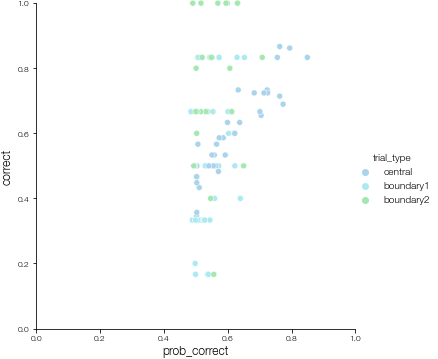

In [8]:
colors = figures.get_induct_colors()
m = stats.groupby(['subject', 'trial_type'])[['correct', 'prob_correct']].mean()
g = sns.relplot(
    data=m.reset_index(),
    x='prob_correct',
    y='correct',
    hue='trial_type',
    clip_on=False,
    palette=colors['light']
)
g.set(xlim=(0, 1), ylim=(0, 1));

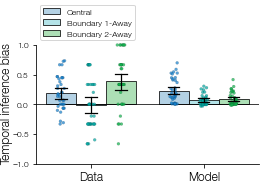

In [9]:
ml = pd.melt(
    m.reset_index(),
    id_vars=['subject', 'trial_type'],
    value_vars=['correct', 'prob_correct'],
    var_name='source',
    value_name='accuracy',
)
ml['bias'] = (ml['accuracy'] - .5) * 2
ml['source'] = ml['source'].map({'correct': 'Data', 'prob_correct': 'Model'})
ml['trial_type'] = ml['trial_type'].map(
    {
        'central': 'Central',
        'boundary1': 'Boundary 1-Away',
        'boundary2': 'Boundary 2-Away',
    }
)
fig, ax = plt.subplots(figsize=(4, 3))
statplot.plot_swarm_bar(
    data=ml,
    x='source',
    y='bias',
    hue='trial_type',
    dodge=True,
    point_kind='strip',
    light=colors['light'],
    dark=colors['dark'],
    bar_kws={'capsize': .1},
    ax=ax,
);
ax.set(ylabel='Temporal inference bias', ylim=(-1, 1.75), yticks=np.arange(-1, 1.5, .5));
ax.axline((0, 0), slope=0, color='k', linewidth=.75);
ax.spines['left'].set_bounds(-1, 1)
ax.legend(loc='upper left', fontsize='small')
ax.yaxis.set_label_coords(-.1, 0.371)
fig.savefig(os.path.join(fig_dir, f'temporal_bias_model-{model_name}.pdf'))